## 대선 자료 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
election = pd.read_csv("./Data/election_2022.csv")
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [3]:
election.tail()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,산청군,31645,24913,7125,16607,464
244,경상남도,거창군,53049,41399,11963,27254,895
245,경상남도,합천군,39768,31270,6911,22742,511
246,제주특별자치도,제주시,408552,296826,157695,122084,10007
247,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [4]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [5]:
# 기본 통계량 확인하기
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [6]:
# 컬럼명만 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [7]:
# Dimension
election.shape

(248, 7)

----

In [8]:
# electionSum에 윤석열 + 이재명 + 심상정 

election['electionSum'] = election[['이재명', '윤석열', '심상정']].sum(axis='columns')
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [9]:
# electionSum이 투표수의 몇퍼센트 
election['electionRatio'] = round(election['electionSum'] / election['투표수'] * 100, 2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [10]:
# csv로 저장하기 (election_2022_job.csv)
election.to_csv("./Data/election_2022_job.csv", index=False)

In [11]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

---
### 광역시도별 투표율을 Pie Chart로 표현하기

In [12]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [13]:
len(election['광역시도'].unique())

17

In [14]:
# pivot을 이용하여 광역시별 투표수의 합계를 집계한다.
elec_sum = \
  election.pivot_table(
    '투표수',
    index='광역시도',
    aggfunc=sum
  )
elec_sum

C:\Users\KDT\AppData\Local\Temp\ipykernel_18820\1779084753.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  election.pivot_table(


,투표수
광역시도,
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831


In [15]:
# elec_sum을 투표수의 순으로 내림차순으로 정렬
elec_sum_order = elec_sum.sort_values(by='투표수', ascending=False)
elec_sum_order.head()

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504


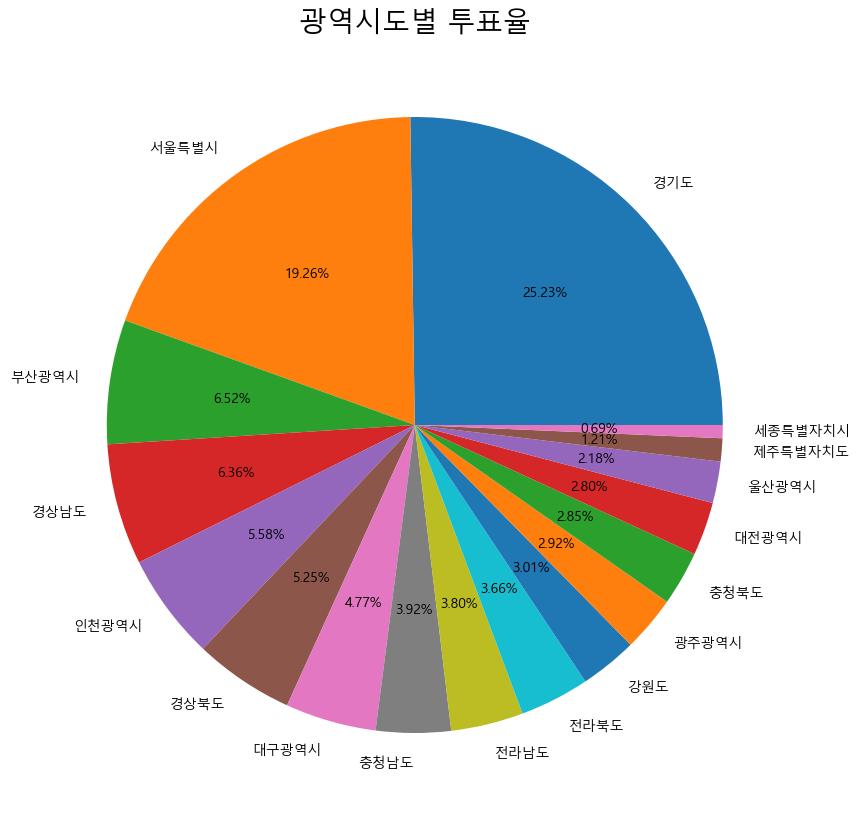

In [16]:
elec_sum_order['투표수'].plot(
  kind='pie',
  figsize=(10, 10),
  autopct='%.2f%%'
)

plt.title('광역시도별 투표율', size=20)
plt.ylabel('')

plt.show()

In [17]:
# 수도권의 투표수가 전체 투표수의 몇 % ?
# 수도권 = 경기도, 인천, 서울
elec_sum_order.iloc[[0,1,4],0].sum() / elec_sum_order['투표수'].sum() * 100

50.064733355557756

### 윤석열 후보의 광역시도별 득표율

C:\Users\KDT\AppData\Local\Temp\ipykernel_18820\1612174154.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  election.pivot_table(


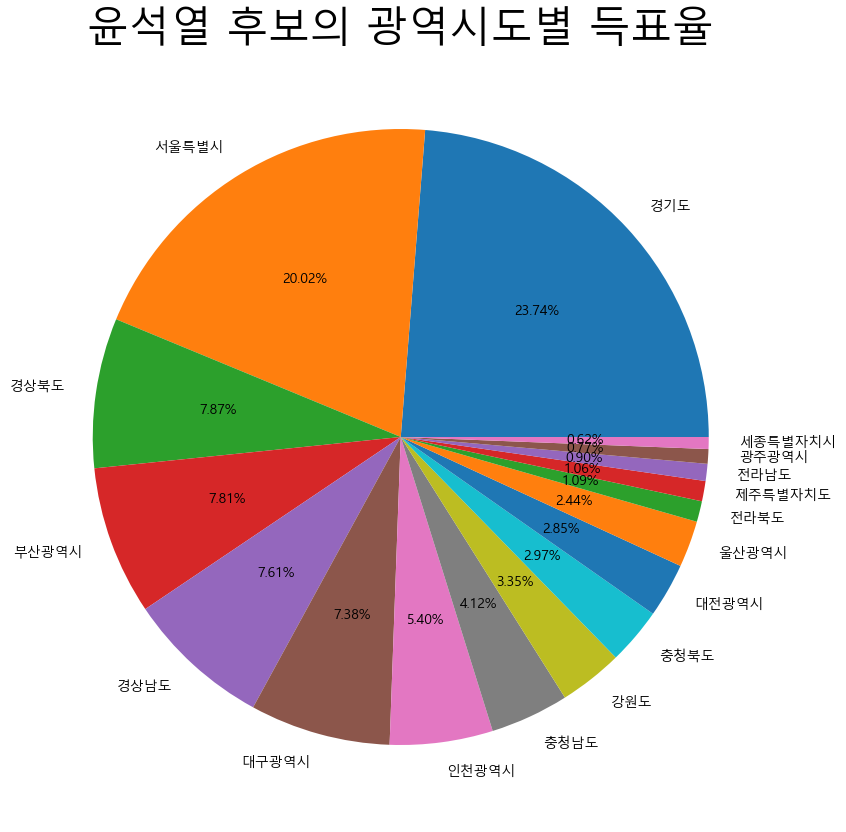

In [18]:
elec_윤석열 = \
  election.pivot_table(
    "윤석열",
    index='광역시도',
    aggfunc=sum
  )

elec_윤석열 = \
  elec_윤석열.sort_values(by='윤석열', ascending=False)

elec_윤석열['윤석열'].plot(
  kind='pie',
  figsize=(10, 10),
  autopct='%.2f%%'
)

plt.title('윤석열 후보의 광역시도별 득표율', size=30)
plt.ylabel('')
plt.show()

#### 이재명 후보의 광역시도별 득표율

C:\Users\KDT\AppData\Local\Temp\ipykernel_18820\1264888571.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  election.pivot_table(


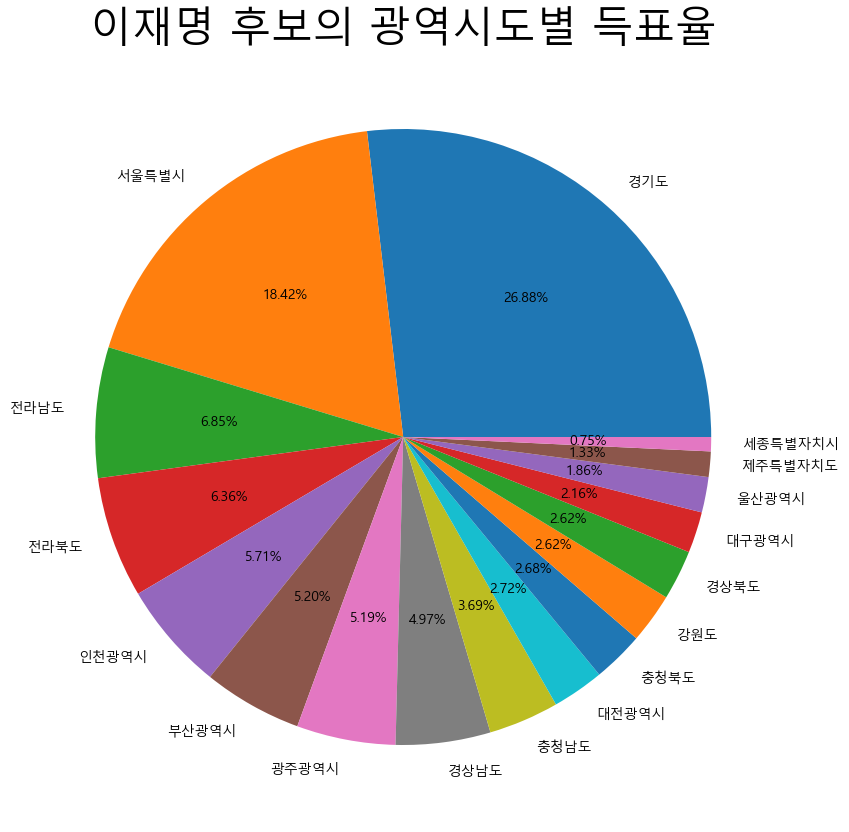

In [19]:
elec_이재명 = \
  election.pivot_table(
    "이재명",
    index='광역시도',
    aggfunc=sum
  )

elec_이재명 = \
  elec_이재명.sort_values(by='이재명', ascending=False)

elec_이재명['이재명'].plot(
  kind='pie',
  figsize=(10, 10),
  autopct='%.2f%%'
)

plt.title('이재명 후보의 광역시도별 득표율', size=30)
plt.ylabel('')
plt.show()

---
### 윤석열 후보의 서울 득표 Top5

In [25]:
election_seoul = \
  election[election.광역시도 == '서울특별시']

election_seoul_윤석열 = \
  election_seoul.sort_values(by='윤석열', ascending=False)

election_seoul_윤석열 = \
  election_seoul_윤석열[['시군구', '윤석열']]

election_seoul_윤석열.head(10)

,시군구,윤석열
23,송파구,255166
22,강남구,235897
15,강서구,181510
21,서초구,179472
10,노원구,163340
24,강동구,160593
20,관악구,151944
14,양천구,149780
11,은평구,140666
19,동작구,135733


In [32]:
# label 만들기

election_seoul_윤석열_label = \
  pd.concat([election_seoul_윤석열.iloc[0:5,0], pd.Series('기타')], ignore_index=True)

election_seoul_윤석열_label

0    송파구
1    강남구
2    강서구
3    서초구
4    노원구
5     기타
dtype: object

In [46]:
# Data 생성

election_seoul_윤석열_data = \
  pd.concat([
      election_seoul_윤석열.iloc[0:5,1],
      pd.Series(election_seoul_윤석열.iloc[5:len(election_seoul_윤석열)+1]['윤석열'].sum())
      ], ignore_index=True)
election_seoul_윤석열_data

0     255166
1     235897
2     181510
3     179472
4     163340
5    2240362
dtype: int64

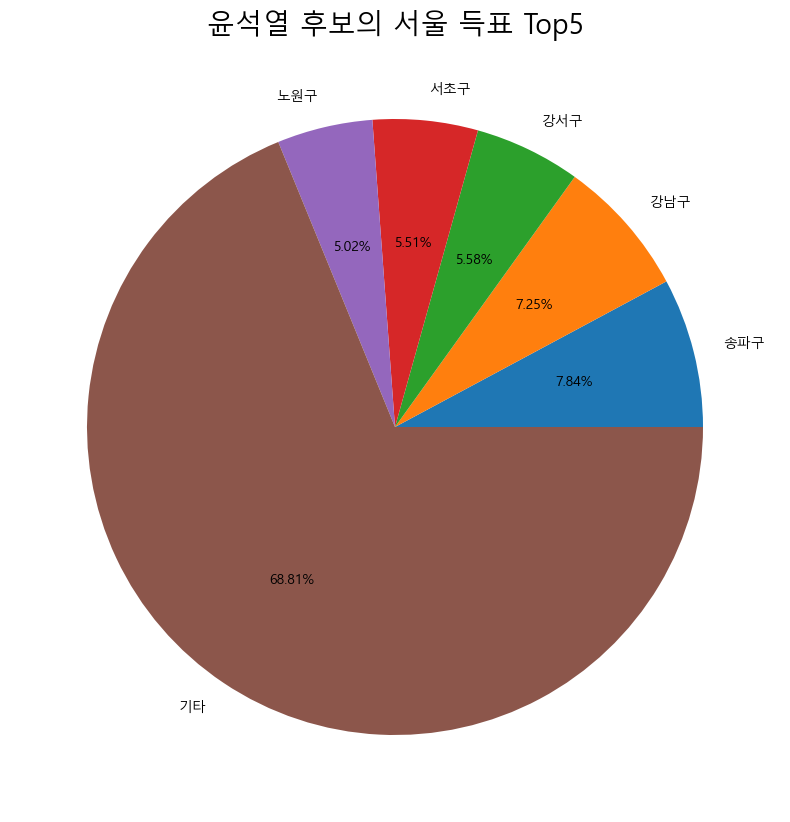

In [52]:
# Pie Chart
election_seoul_윤석열_data.plot(
  kind='pie',
  figsize=(10, 10),
  autopct="%.2f%%",
  startangle=0,
  labels = election_seoul_윤석열_label
)

plt.title('윤석열 후보의 서울 득표 Top5', size=20)

plt.show()

### 대선주자 출생지별 득표율 분석


In [55]:
# 윤석열 후보의 출생지는 서울특별시 성북구 

pob_윤석열 = \
  election[election.시군구 == '성북구']

pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [62]:
# Data

pob_윤석열_data = \
  pd.concat([
    pob_윤석열['윤석열'],
    pob_윤석열['이재명'],
    pob_윤석열['심상정'],
    pob_윤석열['투표수'] - pob_윤석열['electionSum']
  ], ignore_index=True)

pob_윤석열_data

0    135044
1    142702
2      8952
3      5489
dtype: int64

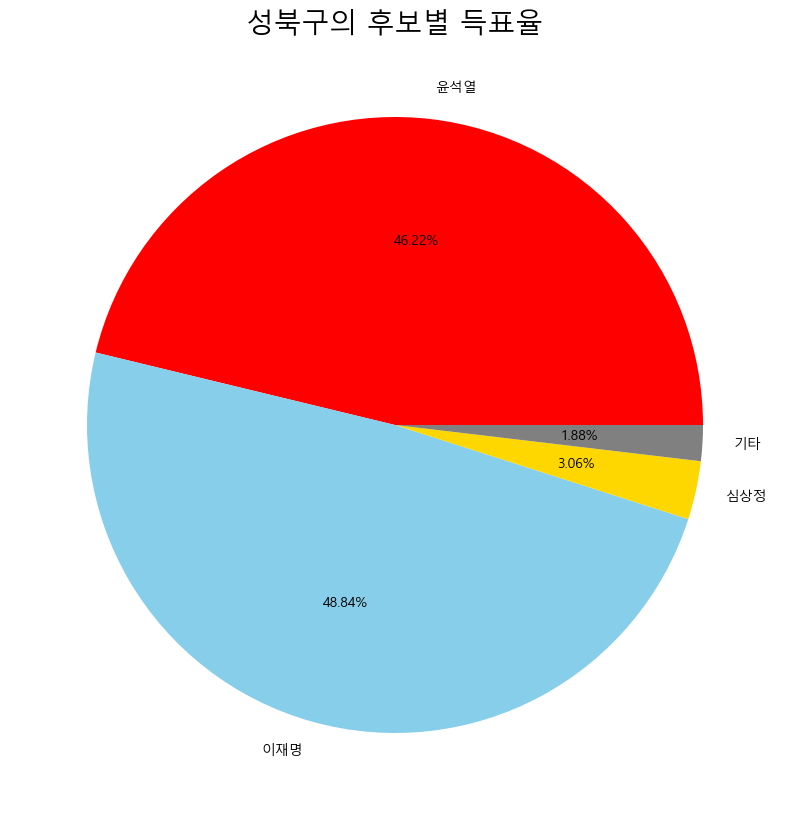

In [66]:
pob_윤석열_data.plot(
  kind='pie',
  labels = ['윤석열','이재명','심상정','기타'],
  figsize=(10, 10),
  autopct = '%.2f%%',
  colors=['red', 'skyblue', 'gold', 'grey']
)

plt.title('성북구의 후보별 득표율', size=20)
plt.show()

### 투표수가 높은 5군데 시군구의 후보별 득표수 

In [71]:
elec_top5 = \
  election.sort_values(
    by='투표수',
    ascending=False
  ).iloc[0:5,[4,5,6]].reset_index(drop=True)

elec_top5

,이재명,윤석열,심상정
0,283324,236055,12955
1,285227,224331,13249
2,239179,203075,10089
3,180490,255166,10652
4,190000,181510,11100


In [86]:
city = \
election.sort_values(
  by='투표수',
  ascending=False
)[0:5]['광역시도'] \
+ " " + \
election.sort_values(
  by='투표수',
  ascending=False
)[0:5]['시군구']

city

100      경기도 화성시
85       경기도 부천시
98      경기도 남양주시
23     서울특별시 송파구
15     서울특별시 강서구
dtype: object

In [89]:
city = \
election.sort_values(
    by='투표수',
    ascending=False
  ).iloc[0:5,0] \
+ " " + \
election.sort_values(
  by='투표수',
  ascending=False
).iloc[0:5,1]

elec_top5.index = list(city.reset_index(drop=True))
elec_top5

,이재명,윤석열,심상정
경기도 화성시,283324,236055,12955
경기도 부천시,285227,224331,13249
경기도 남양주시,239179,203075,10089
서울특별시 송파구,180490,255166,10652
서울특별시 강서구,190000,181510,11100


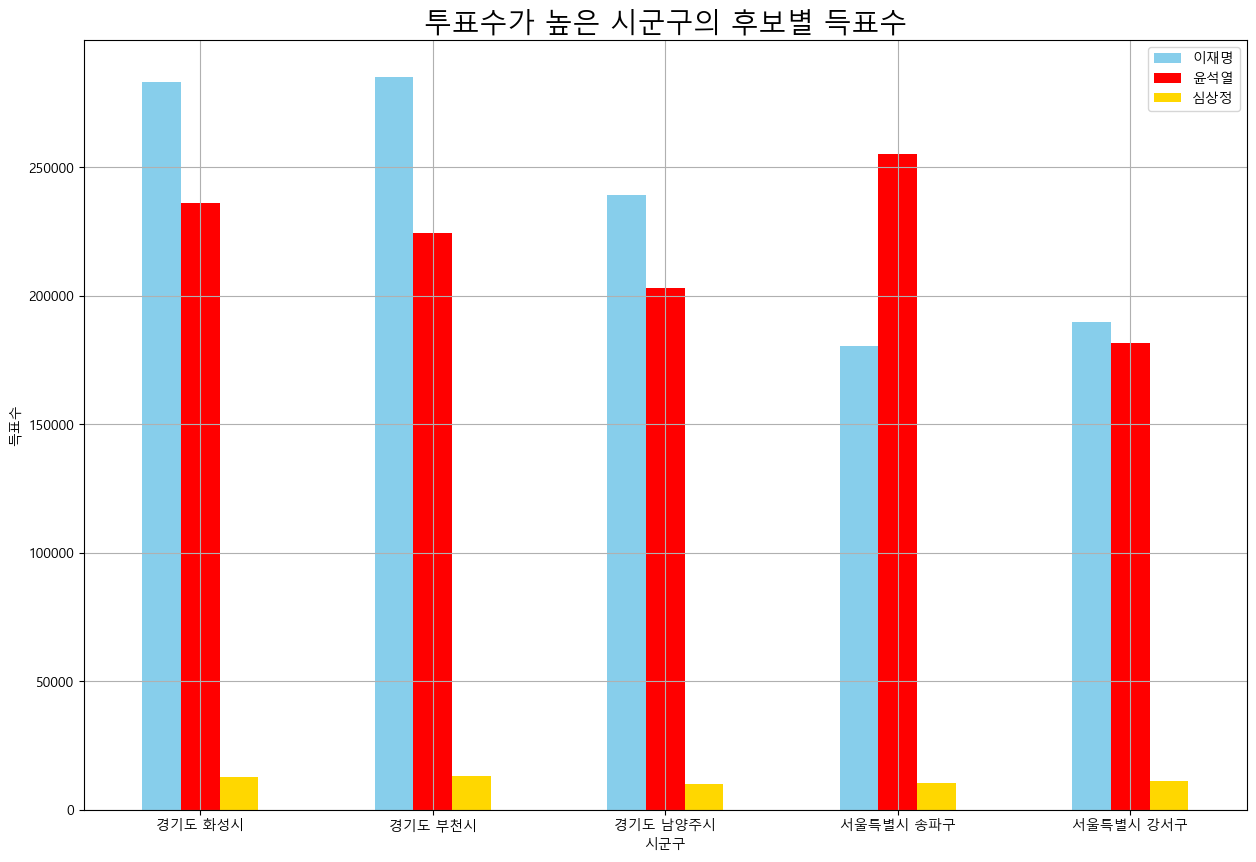

In [96]:
elec_top5.plot(
  kind='bar',
  figsize=(15, 10),
  rot=0,
  color=['skyblue','red','gold']
)

plt.grid()
plt.title('투표수가 높은 시군구의 후보별 득표수', size=20)
plt.xlabel('시군구')
plt.ylabel('득표수')
plt.show()